<a href="https://colab.research.google.com/github/keuperj/DataScienceSS20/blob/master/Exercises/7_a_Autoencoder_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


11493376/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable 

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [78]:
#1 new topology

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple auto encoder model
inputs = keras.Input(shape=(784,))#make input 1D -> 784 = 28*28
#encoder 
l2 = layers.Dense(64, activation="relu")(inputs)
l3 = layers.Dense(32, activation="relu")(l2)
#here is the "bottle neck" a.k.a. latent space
#decoder
l4 = layers.Dense(32, activation="relu")(l3)
l5 = layers.Dense(64, activation="relu")(l4)
outputs = layers.Dense(784, activation="sigmoid")(l5) #784 = 28*28 -< iputü = output

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_65 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_66 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_67 (Dense)             (None, 784)               50960     
Total params: 106,448
Trainable params: 106,448
Non-trainable params: 0
____________________________________________________

In [0]:
#2 - Loss function
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy") #using mean squared error is also an option

In [88]:
#3 train
# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#reshape input to 1D
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#train

history = model.fit(x_train, x_train, batch_size=32, epochs=10, ) #x_train is input and trraget!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1217
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1164
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1144
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1135
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1132
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1126
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1122
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1121
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1120


In [0]:
# 4 test on train data
test_out = model.predict(x_train)

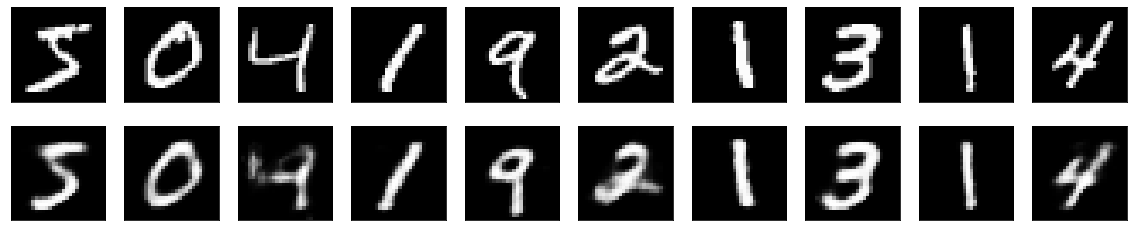

In [91]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_out[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [93]:
#train some more
history = model.fit(x_train, x_train, batch_size=32, epochs=20, ) 

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1108
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1106
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1109
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1106
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1107
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1108
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1108
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1106
E

In [0]:
#test on test
test_out = model.predict(x_test)

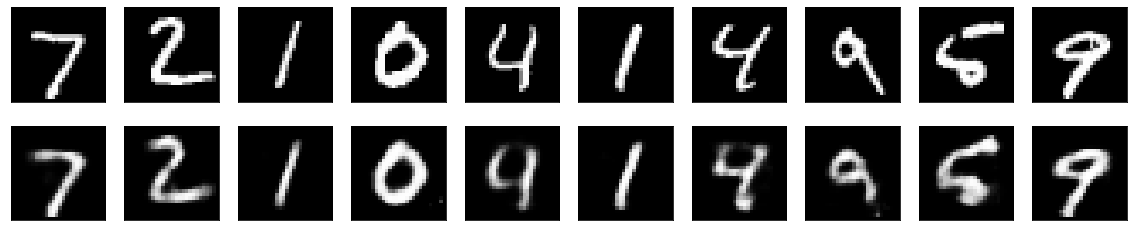

In [96]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_out[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# 5 use this model for outlier detection

#compute some error measure - here we use sum over abs pixel difference (could also be somtehing else)
error = np.sum(np.abs(x_test-test_out),axis=1)

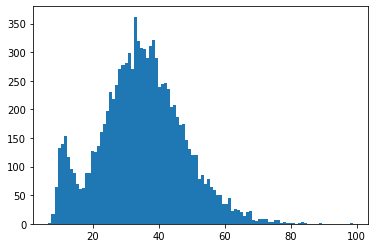

In [98]:
#plot hist 
t=plt.hist(error, bins=100)

In [0]:
#get outliears -> error >80
outliears = x_test[error>80]
outliear_pred = test_out[error>80]

In [101]:
np.shape(outliears)

(9, 784)

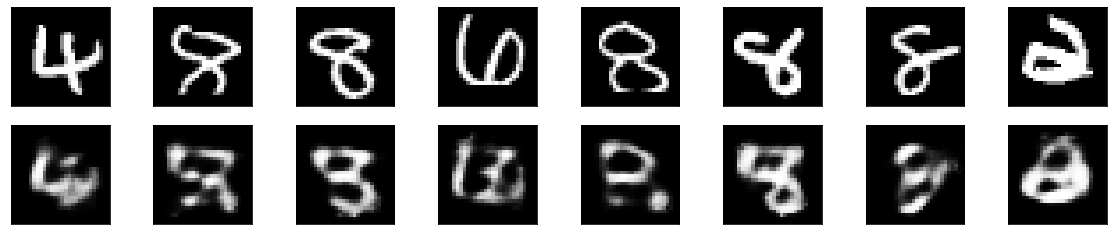

In [105]:
n = 8  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(outliears[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outliear_pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()